# Lab 05 : Train with mini-batches -- demo

In [ ]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/gdrive')
    file_name = 'minibatch_training_demo.ipynb'
    import subprocess
    path_to_file = subprocess.check_output('find . -type f -name ' + str(file_name), shell=True).decode("utf-8")
    print(path_to_file)
    path_to_file = path_to_file.replace(file_name,"").replace('\n',"")
    os.chdir(path_to_file)
    !pwd

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import utils

# Warm up

### Make a random matrix with 5 rows 

In [2]:
A=torch.rand(5,3)
print(A)

tensor([[0.2976, 0.5865, 0.8216],
        [0.7939, 0.6613, 0.5833],
        [0.7961, 0.5487, 0.4077],
        [0.2582, 0.0407, 0.4789],
        [0.0092, 0.7814, 0.7776]])


### Choose at random two indices in {0,1,2,3,4}

In [3]:
indices=torch.LongTensor(2).random_(0,5) # generate an integer randomly from 0 to 5-1.
print(indices)

tensor([3, 2])


### Extract the corresponding rows of the matrix

In [4]:
minibatch=A[indices]
print(minibatch)

tensor([[0.2582, 0.0407, 0.4789],
        [0.7961, 0.5487, 0.4077]])


# Demo

### Download the data and print the sizes

In [5]:
from utils import check_mnist_dataset_exists
data_path=check_mnist_dataset_exists()

In [6]:
train_data=torch.load(data_path+'mnist/train_data.pt')

print(train_data.size())

torch.Size([60000, 28, 28])


In [7]:
train_label=torch.load(data_path+'mnist/train_label.pt')

print(train_label.size())

torch.Size([60000])


In [8]:
test_data=torch.load(data_path+'mnist/test_data.pt')

print(test_data.size())

torch.Size([10000, 28, 28])


### Make a one layer net class

In [8]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        self.linear_layer = nn.Linear( input_size, output_size , bias=False)
        
    def forward(self, x):
        y = self.linear_layer(x)
        prob = F.softmax(y, dim=1)
        return prob

### Build the net

In [9]:
net=one_layer_net(784,10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)


### Choose the size of the mini-batches 

In [10]:
bs=200

### Take the 6th image of the test set:

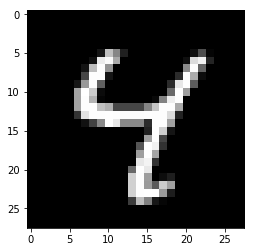

In [11]:
im=test_data[6]
utils.show(im)

### Feed it to the UNTRAINED network and print the confidence scores

In [12]:
prob =  net( im.view(1,784)) 
print(prob)

tensor([[0.0837, 0.0815, 0.1205, 0.0935, 0.1164, 0.1155, 0.0757, 0.1145, 0.1137,
         0.0850]], grad_fn=<SoftmaxBackward>)


### Display visually the confidence scores

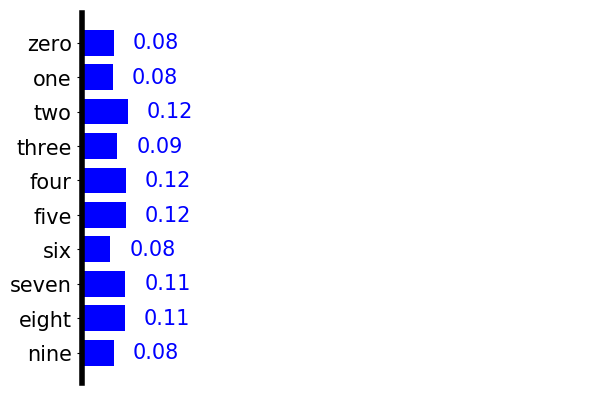

In [13]:
utils.show_prob_mnist(prob)

### Train the network (only 5000 iterations) on the train set

In [14]:
criterion = nn.NLLLoss()
optimizer=torch.optim.SGD(net.parameters() , lr=0.01 )

for iter in range(1,5000):
    
    # create a minibatch
    indices=torch.LongTensor(bs).random_(0,60000)
    minibatch_data =  train_data[indices]
    minibatch_label= train_label[indices]
    
    #reshape them to fit the network
    inputs=minibatch_data.view(bs,784)

    # feed the input to the net  
    inputs.requires_grad_()
    prob=net(inputs) 
    
    
    # update the weights (all the magic happens here -- we will discuss it later)
    log_prob=torch.log(prob)
    loss = criterion(log_prob, minibatch_label)    
    optimizer.zero_grad()       
    loss.backward()
    optimizer.step()
    

### Take the 6th image of the test set:

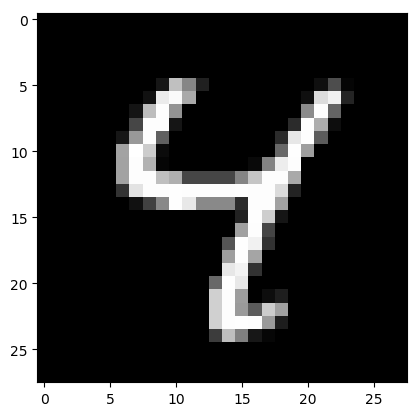

In [15]:
im=test_data[6]
utils.show(im)

### Feed it to the TRAINED net:

In [16]:
prob =  net( im.view(1,784)) 
print(prob)

tensor([[0.0003, 0.0002, 0.0003, 0.0093, 0.8121, 0.0402, 0.0013, 0.0180, 0.0665,
         0.0519]], grad_fn=<SoftmaxBackward>)


### Display visually the confidence scores

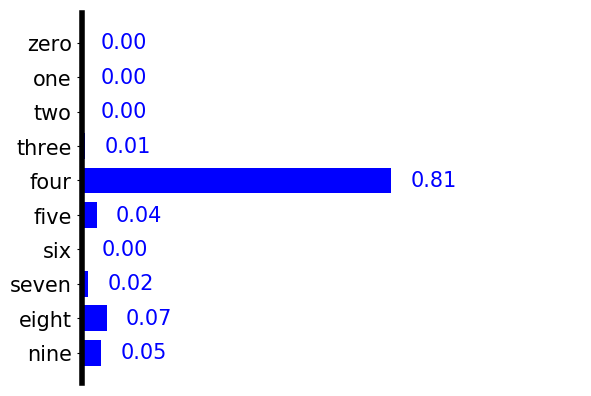

In [17]:
utils.show_prob_mnist(prob)

### Choose image at random from the test set and see how good/bad are the predictions

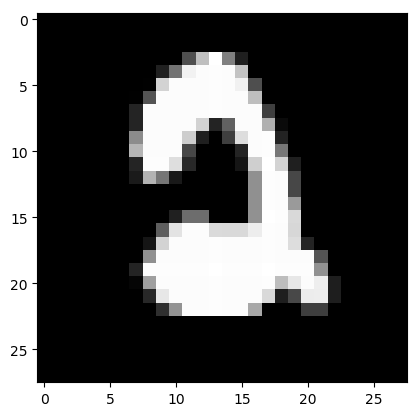

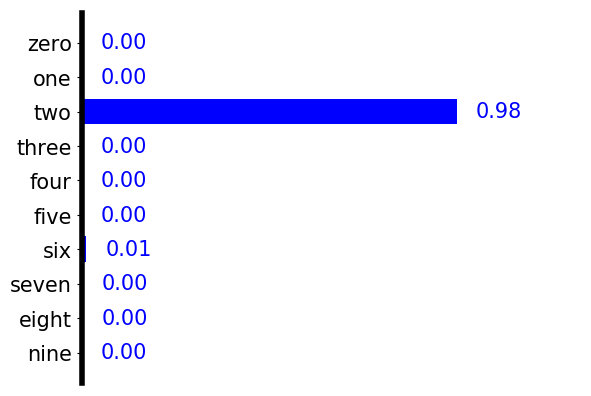

In [19]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
prob =  net( im.view(1,784)) 
utils.show_prob_mnist(prob)